<a href="https://colab.research.google.com/github/fergogu27-ctrl/EDPII/blob/main/Minimos_Cuadrados_para_EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Método de Mínimos Cuadrádos para EDO**

Queremos resolver la ecuación
$$\frac{\ d^2 u}{\ dx^2 } + u =  x$$

sujeta a las condiciones $$u(0)=0 \ \ u'(0)=2$$

Analíticamente:

In [1]:
import sympy as sp    #Cálculo simbólico
import numpy as np    #Hace arreglos, nos ayuda a dar datos para la gráfica

import matplotlib.pyplot as plt

In [2]:
x, a, b=sp.symbols('x a b')
u = sp.Function('u')

Para resolver la ecuación podemos aproximar la solución de forma que esta definida "ode" el cual calculamos la segunda derivada  respecto de x, podemos decir que lo hacemos atraves de calcular el error

In [3]:
ode = sp.Eq(u(x).diff(x, 2)+ u(x) ,x )    #Definimos la función, inidicamos que u es función de x, calcula la derivada 2 respecto de x(diff) , suma la misma función y por ultimo sumamos x
sp.dsolve(ode,u(x))                       #Resuelve la función, indicando cual es la función

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [4]:
sol = sp.dsolve(ode, ics={u(0): 0, sp.diff(u(x),x).subs(x,0): 2} )    #(ics)Es una estructura de diccionario (llave, valor ).  Introducimos los valores de la condición inicial

Obtenemos nuestra solución exacta simbolica de la ecuación con nuestras condiciones iniciales.

In [5]:
sol

Eq(u(x), x + sin(x))

In [6]:
u_expr = sol.rhs                      #Convertimos en un arreglo para poder graficarlo

u_num=sp.lambdify(x, u_expr, "numpy") #Evalua numericamente

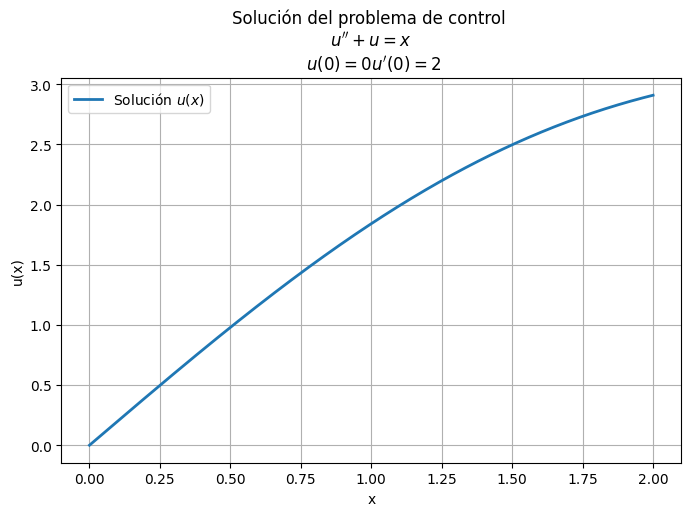

In [7]:
xx=np.linspace(0,2,400)
yy=u_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy,  label='Solución $u(x)$', linewidth=2)
plt.title('Solución del problema de control \n$u\'\'+u=x$ \n $u(0)= 0  u\'(0)=2$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

Ahora vamos a calcular las dos funciones base como en la clase donde teniamos la ecuación $$U_n=\alpha_1*x(1-x)+\alpha_2*x^2(1-x)$$ Para obtener la solución exacta determinamos E=0.
Como observación con mayor terminos tenga nuestra expresión el error va hacer menor.

En la clase tomamos lo anterior como prueba , con el ejercicio correspondiente. Tomamos la ecuación
$$𝑈𝑛=𝛼_0+𝛼_1𝑥+𝛼_2∗𝑥2+𝛼_3∗𝑥3+...$$

Teniendo las C.I.:
$$U_n(0)=0 \ \ \alpha_0=0,  \ \ \ \ U'_n(0)=2 \ \ \alpha_2=2$$

Tomamos una función cúbica $$U_n(x)=2x+ax^2+bx^3$$

Y aplicamos el método minimizando $$I(a,b)=\int_0^1(U''_n(x)+U_n(x)-x)^2dx$$

In [8]:
#Función de prueba u_n(x) que cumple u(0)=0 u'(0)=2
u_n=  2*x + a*x**2 + b*x**3  #Se puede poner u_2, como definimos en clase
u_n

a*x**2 + b*x**3 + 2*x

In [9]:
u_n_2 = sp.diff(u_n, x, 2)  #Es la segunda derivada de la función u_n respecto de x cuantas veces 2
# Residuo (E): u_N'' + u_N - x
E = u_n_2 + u_n - x

In [10]:
E

a*x**2 + b*x**3 + x + 2*(a + 3*b*x)

In [11]:
E.simplify()   #E se introduce como una función y simplifica sus terminos

a*x**2 + 2*a + b*x**3 + 6*b*x + x

In [12]:
#Aplicamos el funcional de mínimos cudrados
I=sp.integrate(E**2, (x, 0, 1))  #sp.simplify(I)
I                                #es función de a y b

83*a**2/15 + 49*a*b/3 + 5*a/2 + 509*b**2/35 + 22*b/5 + 1/3

Obtenemos las derivadas parciales de I respecto a y b

In [13]:
dIa=sp.diff(I,a)
dIb=sp.diff(I,b)

Teniendo ambas ecuaciones tenemos un sistema, lo resolvemos para conocer el valor de a y b

In [14]:
print(dIa,"\n", dIb)

166*a/15 + 49*b/3 + 5/2 
 49*a/3 + 1018*b/35 + 22/5


Resolvemos el sistema de ecuaciones

In [15]:
soleq=sp.solve([dIa,dIb],[a,b],simplify=True) #para igualar a cero
soleq

{a: -1335/86789, b: -24759/173578}

In [16]:
u_approx=u_n.subs(soleq)#sustituir en la funcion de prueba(u_n) para obtner la aproximación final
u_approx

-24759*x**3/173578 - 1335*x**2/86789 + 2*x

In [17]:
#Función numérica de la aproximación
u_approx_fn = sp.lambdify(x, u_approx, "numpy")#convierta en un arreglo para hacer la grafica


Podemos observar que nuestra aproximación por el método de mínimos cuadrados tiene una aproximación mucho mas cercana a nuestra solución exacta que el método de colocación esto nos indica que cada vez el método busca elergir a y b de modo que  aproxima mucho más en ese intervalo.
El método al colocarlo en la integral lo eleva al cuadrado para que el error no se cancele, no obtener errores tan grandes, mide el error global.

En la gráfica determinamos que genere 400 valores y lo grafique en cada punto para poder ver con mayor detalle la comparación entre ambas ecuaciones.

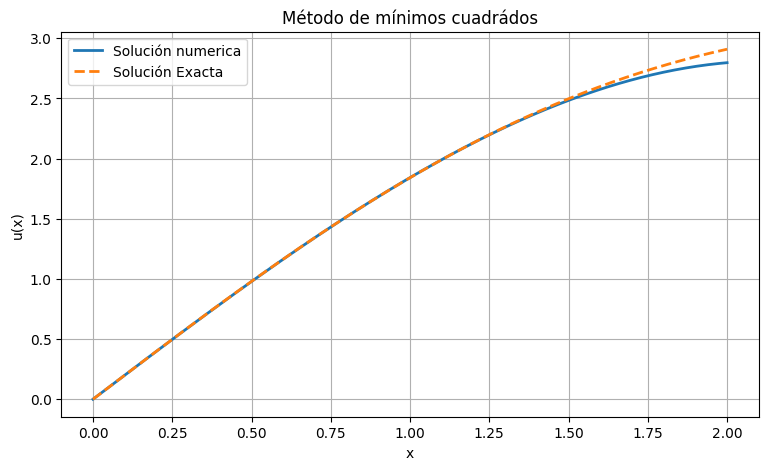

In [18]:
#Solucion analitica y numerica
xx = np.linspace(0,2,400)


plt.figure(figsize=(9, 5))
plt.plot(xx, u_approx_fn(xx), label='Solución numerica', linewidth=2)
plt.plot(xx, u_num(xx), '--', label=f'Solución Exacta',linewidth=2)
plt.title('Método de mínimos cuadrádos')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

Calcule el error de la aproximación numérica.

In [19]:
import pandas as pd

# Elegimos puntos donde queremos ver el error
puntos = np.linspace(0, 1, 11)  # 0, 0.1, 0.2, ..., 1

# Evaluamos exacta y aproximada
tabla_exacta = u_num(puntos)
tabla_aprox  = u_approx_fn(puntos)

# Error
error = tabla_exacta - tabla_aprox
error_abs = np.abs(error)

# Construir tabla
tabla = pd.DataFrame({
    "x": puntos,
    "u_exacta": tabla_exacta,
    "u_aprox": tabla_aprox,
    "error": error,
    "error_abs": error_abs
})

print(tabla)

      x  u_exacta   u_aprox     error  error_abs
0   0.0  0.000000  0.000000  0.000000   0.000000
1   0.1  0.199833  0.199704  0.000130   0.000130
2   0.2  0.398669  0.398244  0.000426   0.000426
3   0.3  0.595520  0.594764  0.000756   0.000756
4   0.4  0.789418  0.788410  0.001008   0.001008
5   0.5  0.979426  0.978325  0.001101   0.001101
6   0.6  1.164642  1.163652  0.000990   0.000990
7   0.7  1.344218  1.343538  0.000680   0.000680
8   0.8  1.517356  1.517124  0.000232   0.000232
9   0.9  1.683327  1.683557 -0.000230   0.000230
10  1.0  1.841471  1.841979 -0.000508   0.000508


[0.00000000e+00 3.83457278e-07 1.52172548e-06 3.39665202e-06
 5.99009062e-06 9.28390451e-06 1.32599696e-05 1.79001775e-05
 2.31864390e-05 2.91006869e-05 3.56248793e-05 4.27410029e-05
 5.04310758e-05 5.86771512e-05 6.74613199e-05 7.67657141e-05
 8.65725101e-05 9.68639317e-05 1.07622253e-04 1.18829803e-04
 1.30468965e-04 1.42522186e-04 1.54971973e-04 1.67800900e-04
 1.80991612e-04 1.94526825e-04 2.08389331e-04 2.22562003e-04
 2.37027792e-04 2.51769738e-04 2.66770967e-04 2.82014698e-04
 2.97484243e-04 3.13163013e-04 3.29034520e-04 3.45082377e-04
 3.61290309e-04 3.77642147e-04 3.94121837e-04 4.10713441e-04
 4.27401141e-04 4.44169242e-04 4.61002174e-04 4.77884495e-04
 4.94800896e-04 5.11736204e-04 5.28675382e-04 5.45603535e-04
 5.62505913e-04 5.79367913e-04 5.96175081e-04 6.12913119e-04
 6.29567884e-04 6.46125393e-04 6.62571825e-04 6.78893526e-04
 6.95077009e-04 7.11108962e-04 7.26976244e-04 7.42665895e-04
 7.58165134e-04 7.73461364e-04 7.88542178e-04 8.03395355e-04
 8.18008870e-04 8.323708

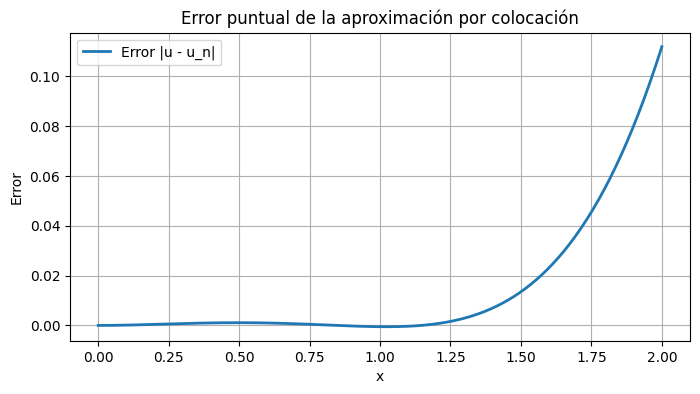

In [20]:
# Error aprox
error = u_num(xx) - u_approx_fn(xx)
error_abs = np.abs(error)
print(error_abs)


# Gráfica del error aprox
plt.figure(figsize=(8,4))
plt.plot(xx, error, label="Error |u - u_n|", linewidth=2)
plt.title("Error puntual de la aproximación por colocación")
plt.xlabel("x")
plt.ylabel("Error")
plt.grid(True)
plt.legend()
plt.show()